In [2]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [9]:
data=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Clustering\\EastWestAirlines.csv")

In [10]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
data_1=data.drop(['ID#'],axis=1,inplace=True)

In [14]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [20]:
df_norm=norm_func(data.iloc[:,1:])

In [21]:
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [22]:
df_norm.groupby(['cc3_miles']).count()

,Qual_miles,cc1_miles,cc2_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cc3_miles,,,,,,,,,
0.00,3981,3981,3981,3981,3981,3981,3981,3981,3981
0.25,3,3,3,3,3,3,3,3,3
0.50,4,4,4,4,4,4,4,4,4
0.75,6,6,6,6,6,6,6,6,6
1.00,5,5,5,5,5,5,5,5,5


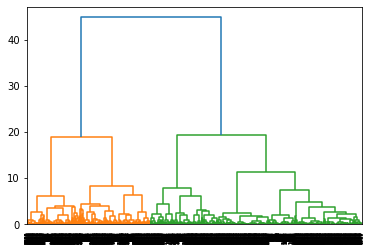

In [47]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [43]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward') # or use complete linkage gives better clusters.

In [44]:
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters;

In [45]:
data2=pd.concat([data,Clusters],axis=1)

In [46]:
data2.groupby(['Clusters']).count() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,
0,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481
1,1725,1725,1725,1725,1725,1725,1725,1725,1725,1725,1725
2,793,793,793,793,793,793,793,793,793,793,793
